# Otto Kailing -- Vital Sign Data Sonification

## Setup

In [1]:
# from José: necessary setup
# # Author: José Constantino Sánchez Curet
# # This is an experiment made July 10-11 for the IQ-BIO-2020 Hackaton as part of exploring some ideas about sonifying the data

# Install the necessary things before importing
!pip install saxpy
!pip install playsound
!pip install simpleaudio

# Importing libraries and required packages
import numpy as np

from saxpy.znorm import znorm              # to normalize the time series
from saxpy.paa import paa                  # PAA
from saxpy.sax import ts_to_string         # to convert the time series to string
from saxpy.alphabet import cuts_for_asize  # alphabet size
from saxpy.sax import ts_to_string         # for whole-dataset SAX string
from saxpy.sax import sax_via_window       # for smaller SAX words

import matplotlib.pyplot as plt

import simpleaudio as sa                # sound playing package

import csv                 # to be able to import .csv files
import pandas as pd        # for the readcsv function, to read in data

     |████████████████████████████████| 178 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 207 kB 8.8 MB/s eta 0:00:01
  Created wheel for saxpy: filename=saxpy-1.0.1.dev167-py3-none-any.whl size=17670 sha256=a79d3e4e18b108d8d873e9525fe549d6feaba1054d5a57f7a9e72d1f0f300d11
  Stored in directory: /Users/ottokailing/Library/Caches/pip/wheels/47/e9/8b/80a17d9e8eb40d6116bdf0ff13a37223efeec9b7c66749e512
Successfully built saxpy
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pytest-cov 2.11.1 requires pytest>=4.6, but you'll have pytest 0.0.0 which is incompatible.
     |████████████████████████████████| 2.0 MB 2.2 MB/s eta 0:00:01


## The first heart rate file 

### Importing and normalizing

In [2]:
# Importing a heart rate data file
# "header = None" b/c the file has no headers
data1 = pd.read_csv("dataFiles/HR_185938.csv", header = None)

# view file
data1

,0,1
0,11/25/2006 0:00:00,169
1,11/25/2006 1:00:00,160
2,11/25/2006 2:00:00,170
3,11/25/2006 3:00:00,171
4,11/25/2006 5:00:00,174
...,...,...
629,12/11/2006 20:00:00,151
630,12/11/2006 21:00:00,154
631,12/11/2006 22:00:00,154
632,12/11/2006 23:00:00,161


In [3]:
# Isolate the data from column 1 (heart rate numbers)
hr1 = data1[1]
hr1

0      169
1      160
2      170
3      171
4      174
      ... 
629    151
630    154
631    154
632    161
633    152
Name: 1, Length: 634, dtype: int64

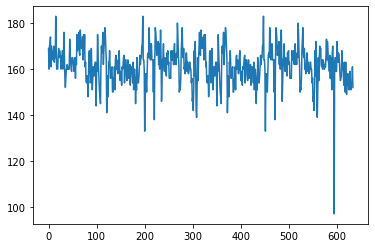

In [4]:
# Plot the data on a graph (using default pyplot settings) just as a basic visualization
plt.plot(hr1)

0      0.910436
1     -0.206757
2      1.034568
3      1.158701
4      1.531098
         ...   
629   -1.323950
630   -0.951552
631   -0.951552
632   -0.082624
633   -1.199817
Name: 1, Length: 634, dtype: float64

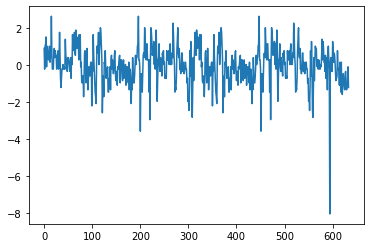

In [5]:
# Normalize the data with znorm; display and plot
hr1_znorm = znorm(hr1)
plt.plot(hr1_znorm)
hr1_znorm

### Testing different PAA sizes

Let's apply PAA with many different sizes to this dataset. By doing this, we can see how much we can shrink an example dataset without completely losing its contour.

array([ 0.05736723,  0.01390127, -0.0712685 ])

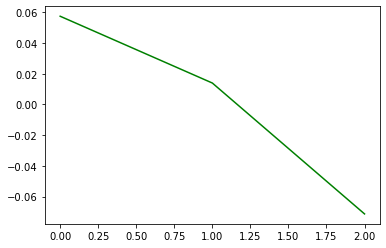

In [6]:
# Apply PAA to the normalized data w/ size of 3
hr1_paa_3 = paa(hr1_znorm, 3)
plt.plot(hr1_paa_3, color = "g")
hr1_paa_3

array([ 0.37572598, -0.2192877 ,  0.20244954, -0.11551763, -0.16896901,
        0.25785884, -0.33226003])

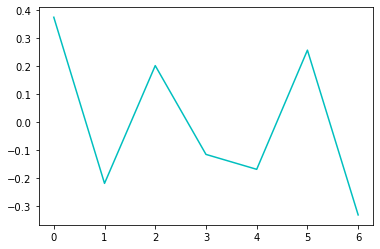

In [7]:
# Apply PAA to the normalized data w/ size of 7
hr1_paa_7 = paa(hr1_znorm, 7)
plt.plot(hr1_paa_7, color = "c")
hr1_paa_7

array([ 0.39021464,  0.41136024, -0.08967301, -0.24337019, -0.18169553,
        0.25590092,  0.25081031, -0.05345138, -0.1004416 , -0.28331188,
       -0.11297233,  0.21478447,  0.21713398, -0.12981049, -0.54547816])

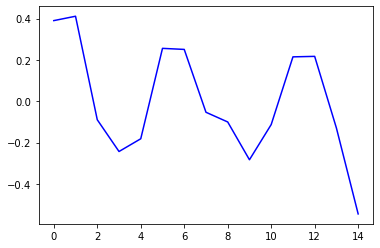

In [8]:
# Apply PAA to the normalized data w/ size of 15
hr1_paa_15 = paa(hr1_znorm, 15)
plt.plot(hr1_paa_15, color = "b")
hr1_paa_15

array([ 0.61674666,  0.16368261,  0.36378264,  0.45893783, -0.19540101,
        0.01605499, -0.25453037, -0.23221001, -0.56466583,  0.20127478,
        0.46050418,  0.05129766,  0.28194133,  0.21967929, -0.50044586,
        0.39354311, -0.42526151,  0.22437831, -0.3355885 , -0.23103526,
       -0.46716112,  0.24121647,  0.4969216 , -0.06735265,  0.29564681,
        0.13862115, -0.4836077 ,  0.22398672, -0.28507401, -0.80588231])

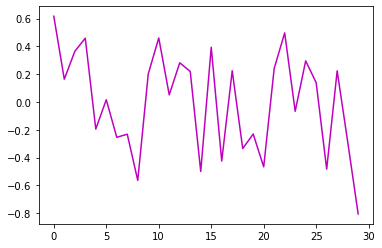

In [9]:
# Apply PAA to the normalized data w/ size of 30
hr1_paa_30 = paa(hr1_znorm, 30)
plt.plot(hr1_paa_30, color = "m")
hr1_paa_30

array([ 0.67900871,  0.55448462,  0.41938773, -0.09202252,  0.24434915,
        0.48321612,  1.15713422, -0.23925855, -0.24239123, -0.14841078,
        0.01801292,  0.01409707, -0.50318696, -0.00587378, -0.24748184,
       -0.21693819, -0.44327443, -0.68605724,  0.35830044,  0.04424913,
       -0.0078317 ,  0.92884005,  0.16603212, -0.0634368 ,  0.34107069,
        0.22281197,  0.41821298,  0.0211456 , -0.73539697, -0.26549475,
        1.16261641, -0.37553019, -0.37239751, -0.47812551,  0.8191962 ,
       -0.37043958, -0.64768189, -0.02349511, -0.1135597 , -0.34851081,
       -0.59755899, -0.33676326,  0.06539473,  0.41703822,  0.26001256,
        0.73383063, -0.13588006,  0.00117476,  0.43426797,  0.15702566,
        0.52119988, -0.24395757, -1.1046618 ,  0.1374464 ,  0.33950435,
        0.1084691 , -0.51728403, -0.052864  , -0.74910246, -0.86266216])

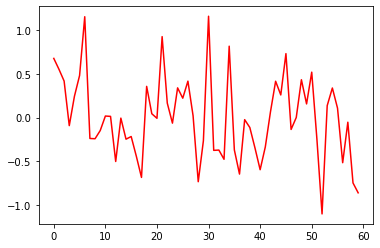

In [10]:
# Apply PAA to the normalized data w/ size of 60
hr1_paa_60 = paa(hr1_znorm, 60)
plt.plot(hr1_paa_60, color = "r")
hr1_paa_60

array([ 8.33684855e-01,  5.24332560e-01,  9.01037507e-01,  2.07931732e-01,
        5.63882664e-01,  2.74892799e-01, -2.89773036e-02, -1.55067733e-01,
        3.50860324e-01,  1.37837985e-01, -5.24724146e-02,  1.01890465e+00,
        1.19707591e+00,  1.11719253e+00,  2.63145243e-01, -7.41662337e-01,
        1.91876740e-02, -5.03970131e-01, -4.90656235e-01,  1.93834666e-01,
       -8.45040826e-01,  8.81066662e-01,  9.06519699e-01, -8.78325566e-01,
       -7.79254515e-02, -9.28448470e-01, -1.07294340e-01,  9.55467847e-02,
       -5.41562308e-01,  4.65986368e-02, -1.57808829e-01, -2.76067554e-01,
       -3.20316680e-01, -5.66232175e-01, -8.27419492e-01, -5.44694990e-01,
        5.47827671e-01,  1.68773214e-01, -8.64620085e-01,  9.53118336e-01,
        6.34367997e-01, -6.50031404e-01,  1.24680722e+00,  6.10872886e-01,
        2.19287703e-02,  3.10135465e-01,  6.42199701e-02, -1.91093569e-01,
        1.30006281e-01,  5.52135108e-01,  8.48565092e-01, -4.02941154e-01,
        7.25607345e-01,  

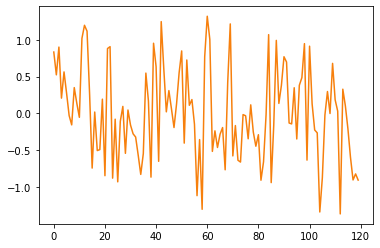

In [11]:
# Apply PAA to the normalized data w/ size of 120
hr1_paa_120 = paa(hr1_znorm, 120)
plt.plot(hr1_paa_120, color = (0.968, 0.5, 0.05)) # ran out of good colors
hr1_paa_120

half length = 317


array([ 0.35183929,  1.09663431,  0.7242368 ,  0.91043555,  0.35183929,
        0.78630305,  0.41390554,  1.53109807,  0.22770678, -0.20675698,
        0.7242368 ,  0.60010429,  0.53803804,  0.10357428,  0.53803804,
        0.10357428,  1.15870056, -0.951552  , -0.45502198, -0.08262447,
       -0.20675698, -0.14469073,  0.9725018 ,  0.04150803,  0.04150803,
        0.35183929, -0.14469073,  0.16564053, -0.14469073,  0.8483693 ,
        0.8483693 ,  1.53109807,  0.60010429,  1.71729682,  0.9725018 ,
        1.34489931,  0.9725018 ,  1.15870056,  0.04150803, -0.88948574,
       -0.57915449, -1.199817  ,  0.7242368 , -0.51708823,  0.10357428,
       -0.76535324, -0.39295573, -0.51708823,  0.04150803, -1.01361825,
       -0.33088948,  1.09663431, -0.45502198, -1.57221451, -1.01361825,
        0.8483693 ,  1.40696556,  0.41390554,  1.65523057,  1.40696556,
       -1.13775075, -0.951552  , -0.76535324,  0.41390554, -0.39295573,
       -0.20675698, -0.76535324, -1.0756845 , -0.64122074, -0.51

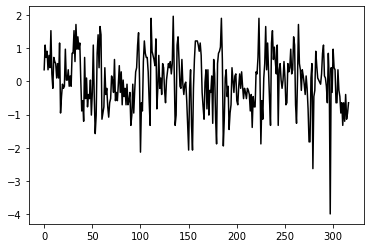

In [12]:
# Define half to ensure integer output, using // (truncate)
half = len(hr1) // 2; print("half length =" , half)

# Apply PAA to the normalized data w/ size of half the dataset
hr1_paa_half = paa(hr1_znorm, half)
plt.plot(hr1_paa_half, color = 'k')
hr1_paa_half

#### Observations:

+ Size of 3: laughably simplistic
+ Size = 7 and 15: no notable difference between the information gleaned; same contour of the graphs
+ Doubling exactly now. Size = 30: noticeably more detail
+ 60: noticeaably different contour along with additional data -- high and low points are actually in different places than the raw data's outliers (why?)
+ 120: looks similar to 60
+ 317 ("half"): looks almost identical to the pre-PAA data; only now is the outlier (97bpm) spike lower than any others.

#### Conclusions:

Depending on the goal, different PAA size might be ideal. A smoother, more generalized shape would be better for an audification, or a "melody" formed to represent the contour of the data. 

On the other hand, for finding outliers and/or pattern recognition via sliding-window SAX, a more detailed, granular dataset closer to the scale of the raw data would be preferable.

## The second dataset: from MIMIC II

These data files are measured once per minute, not once per hour. This is much closer to our eventual use-case. It should be noted that these are from adults, not babies, so the raw heart rate numbers should be lower.

### Setup

The first commented out section is completely superfluous. I just left it in as documentation of my silliness.

In [13]:
###### EDIT: this entire section is superfluous. turns out these specific
# .dat files play perfectly nice with pandas' read_csv function... ######

# ============ IMPORTING THE FILE
# help from: https://www.geeksforgeeks.org/extract-numbers-from-a-text-file-and-add-them-using-python/

# Read in the file
# file = open("newImprovedData/dat/HR_a40006_1.dat", "r") # open file
# content = file.readlines() # breaks down line by line
# file.close() # close file (before I forget!)
# nums = [] # declare list
# content

# Testing

# for line in content:
#     print(line)
# content

In actuality, I'm still using pandas' read_csv, which for some reason works on this .dat file (ASCII plaintext, with \n characters, but no commas; one floating point number per line).

In [14]:
# Trying pandas lol (and read_csv works despite lack of commas...
# seems like I just wasted my time with everything above)

# Read the first MIMIC II file in
data2 = pd.read_csv("newImprovedData/HR_a40006_1.dat", header = None)

# Convert into a 1-dimensional array (as before)
hr2 = data2[0]
hr2  # notice the data type is now float64. This is what we need!

0        98.0
1       100.2
2       103.5
3       100.3
4        96.8
        ...  
3860     76.2
3861     79.5
3862     74.0
3863     77.1
3864     73.0
Name: 0, Length: 3865, dtype: float64

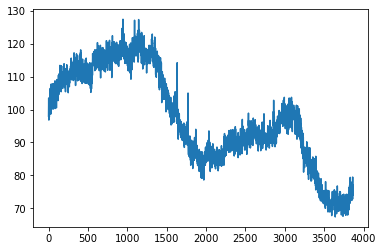

In [15]:
# Plot the data
plt.plot(hr2)

Looking at the graph, it's clear that these data (collected every minute rather than every hour) are much better to work with, in terms of creating an audio representation! The baby data just aren't frequent enough to produce smoother more realistic patterns (they look more like the stock market).

Also, there are 3865 points in this example time series, at a collection rate of one per minute* (these data come from the "training set"). With one data point every minute, 3865 minutes corresponds to 2.68 days of data.

In terms of a sonic representation, imagine notes of length 1 beat (i.e. quarter notes) at 120 bpm. It would take 3865 / 120 = <em>over 32 minutes</em> for a direct audification of one note per data point to be played. Clearly we need to shrink this by an order of magnitude to get a useful sonificiation.

\* [Link to the PhysioNet challenge page](https://physionet.org/content/challenge-2009/1.0.0/): you can see documentation and download datasets here

### What happens if we apply PAA without normalizing?


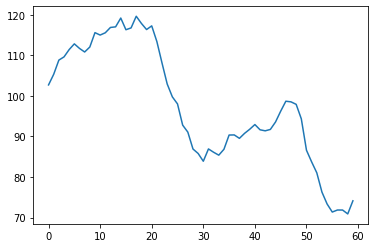

In [16]:
hr2_paa_no_normalize = paa(hr2, 60)
plt.plot(hr2_paa_no_normalize)

OK. Seems to still work.

To avoid breaking status quo, I'm going to go ahead and normalize for my actual implementation below, but I wonder if in the future -- when we implement outlier sounds -- that using the actual heart rate values would make it easier for doctors/nurses to understand where to set cutoffs. 

While my initial impression was that normalization was necessary for SAX, Lilliana didn't actually normalize anything (or even apply PAA due to the low frequency of Carsten's data). However, the typical implementations of SAX involve raw data --> normalize --> PAA --> SAX so I will do this.

Furthermore, normalized data would be vital if the future includes comparing each patient to an average vital sign pattern. A patient might naturally have a higher resting heart rate than average, but still follow a similar <em>pattern</em> of HR as an average person with a similar sleep/exercise schedule. Normalizing around zero means that inconsequential differences between individuals become less important.

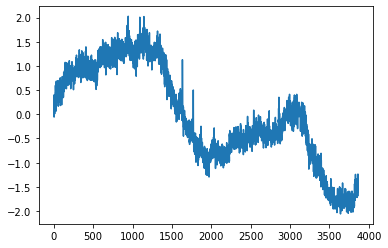

In [17]:
# Normalize the data.
hr2_znorm = znorm(hr2)
plt.plot(hr2_znorm)

### Finding an appropriate PAA size

Great! Now, this is a much larger dataset than before. Given the variable length of these datasets, it seems appropriate to define the PAA size parameter as a fraction of the total length, rather than a hardcoded number. Let's see how 10% looks.

10% of length = 386
Size of dataset after PAA = 386 (the same, obviously)


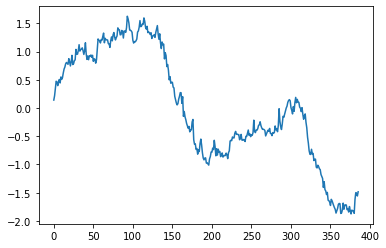

In [18]:
# Define 10% of the length
pct_10 = int(len(hr2_znorm) * 0.10) # int() truncates.
                                    # could also have done len(hr2) // 10.
print("10% of length =", pct_10)

# Apply PAA with size = 10% of dataset length
hr2_paa_10 = paa(hr2_znorm, pct_10)
plt.plot(hr2_paa_10)
print("Size of dataset after PAA =", len(hr2_paa_10), "(the same, obviously)")

OK, first of all, that took at least 30 seconds to run. Also, it looks like some of the outlier spikes were already removed from the graph with a PAA shrinking the number of data points by a factor of 10 (noting the two spikes between 1500 and 2000).

Let's look at how many values are present. The original dataset consisted of 3865 points. A remainder-less division by 10 results in this dataset consisting of 386 points. If our target length is between 30 seconds and 1 minute, a melody made from this PAA / 10 dataset would still take more than 3 minutes.

A better approach might be to divide that in four again; or in other words our PAA size should be 2.5%.

2.5% of length = 96
Alternate calculation method: 96


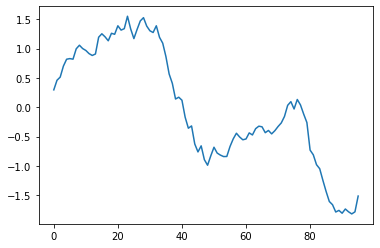

In [19]:
# Define 2.5% of the length
pct_2_5 = int(len(hr2_znorm) * 0.025) # could have used // 40
print("2.5% of length =", pct_2_5)
print("Alternate calculation method:", len(hr2_znorm) // 40)

# Apply PAA with size ~= 2.5% of dataset length (or slightly less)
hr2_paa_2_5 = paa(hr2_znorm, pct_2_5)
plt.plot(hr2_paa_2_5)

That looks much clearer, and 96 points would result in a song length of exactly 0.8 minutes at 120 bpm. Or tick it up slightly faster: at 180 bpm, 0.533333... minutes, aka 32 seconds. Even better! Let's work with this.

### Implementing SAX

Now we will create a SAX string out of the entire dataset. Looking at the documentation*, it looks like we can use ts_to_string to, as the name implies, convert a <u>t</u>ime <u>s</u>eries <u>to</u> a <u>string</u>. The length will, by default, be the length of the dataset.

We will use an 8-letter SAX representation**, in order to put the pattern into a standard (major or minor) musical scale. Other viable numbers, for a pitch representation, might include 12 (for all the notes in a chromatic scale) or 4 (could use scale degrees 1-3-5-7 or 1-3-5-8).

\* [Pavel Senin's saxpy page on GitHub](https://github.com/seninp/saxpy)<br>
\** From testing different numbers, it looks like 20 is the maximum number of letters for saxpy; in other words, you can't go beyond the letter "s".

In [20]:
# Creates a SAX string out of the data

hr2_sax = ts_to_string(hr2_paa_2_5, cuts_for_asize(8))
hr2_sax

'effggggggggggghhhghhhhhhhhhhhhhhhhggffeeedcdcbcbbbbbbbbccccccccccccccccddeedeeddbbbbaaaaaaaaaaaa'

### Baby's First Sonification

Despite all the pitfalls of using pitch as a method of sonification, I am going to employ it here as proof of concept. My eventual idea for this data-analysis sonification was to overlay this melody with more prominent alerts in one of these schemes:
1. <strong>outliers</strong> (which could be concurrent with "h" and "a");
0. <strong>SAX distance</strong> from some average heart rate pattern (computed in the future);
0. or <strong>abnormal SAX "words"</strong> obtained from a sliding-window SAX across a less smoothed dataset.

Also, I had said before that I was planning to use a MIDI implementation from [the PythonInMusic wiki page](https://wiki.python.org/moin/PythonInMusic), but didn't get around to it. I am using .wav files\* of individual music notes. For this implementation I am using the A major scale, so the notes more or less correspond to the actual SAX letters in the string above. (If you played the notes directly on a piano, you would hear an A natural minor scale, but I thought that would sound a bit dark.)

\* If you care: I used a faux-Rhodes-electric piano sound from a program called FL Studio to create .wav files of all the notes in the chromatic scale from A4 to A5. (No microtonality. \[Yet.\])

In [21]:
# Credit again to José's hackathon code, which showed me how to use simpleaudio.
# I wonder if there's a better way to hardcode this than "if char == 'a'"...

# # Commented out for not interrupting the demo

# # Iterate through the string
# for char in hr2_sax:
#     # Test for each character
#     if char == "a":
#         # Play the note A (from file)
#         sound = sa.WaveObject.from_wave_file("soundFiles/a_low.wav").play()
#     elif char == "b":
#         # Play the note B (from file)
#         sound = sa.WaveObject.from_wave_file("soundFiles/b.wav").play()
#     elif char == "c":
#         # Play the note C# (to stay in Amaj scale. Filename is Db.)
#         sound = sa.WaveObject.from_wave_file("soundFiles/db.wav").play()
#     elif char == "d":
#         # You know the drill.
#         sound = sa.WaveObject.from_wave_file("soundFiles/d.wav").play()
#     elif char == "e":
#         sound = sa.WaveObject.from_wave_file("soundFiles/e.wav").play()
#     elif char == "f":
#         sound = sa.WaveObject.from_wave_file("soundFiles/gb.wav").play()
#     elif char == "g":
#         sound = sa.WaveObject.from_wave_file("soundFiles/ab.wav").play()
#     elif char == "h":
#         # This is the high A (scale degree 8).
#         sound = sa.WaveObject.from_wave_file("soundFiles/a.wav").play()
#     # no "else" -- no other characters!
    
#     # Means each sound comes in sequence. Otherwise you'd hear all
#     # the sounds at the same time (lovely!).
#     sound.wait_done()
    

It made sounds! Probably took a bit too long, though. Lots of repetitition. However, if one imagines this as a blank canvas that also includes more striking sounds (percussion, arpeggio, different instrument sound?) for outliers or abnormalities, then it doesn't seem so bad.

### Refining the sonification

As audification on its own, though, a more compact representation might be better. It appears that a representation of over 30 seconds results in lots of unnecessary repetition of the notes. 

Here goes for a short one.

1.25% of length = 48


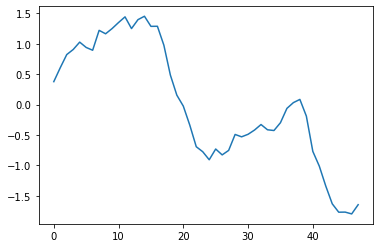

In [22]:
# Half as long again: 1.25% of original length
pct_1_25 = int(len(hr2_znorm) * 0.0125)
print("1.25% of length =", pct_1_25)

# Apply PAA with this calculated size
hr2_paa_1_25 = paa(hr2_znorm, pct_1_25)
plt.plot(hr2_paa_1_25)

# Create the SAX string
hr2_sax_short = ts_to_string(hr2_paa_1_25, cuts_for_asize(8))

#### Making a "melody" function

Let's define a function for our generated melody, so that we don't have to write it out every time.

In [23]:
def melody(sax, black_box):
    if not black_box: print("Starting playback...")
    
    # Iterate through the characters
    for char in sax:
        # Print the current letter
        if not black_box: print(char, end="")
        
        # Test for each character and play the correct note
        if char == "a":
            sound = sa.WaveObject.from_wave_file("soundFiles/a_low.wav").play()
        elif char == "b":
            sound = sa.WaveObject.from_wave_file("soundFiles/b.wav").play()
        elif char == "c":
            sound = sa.WaveObject.from_wave_file("soundFiles/db.wav").play()
        elif char == "d":
            sound = sa.WaveObject.from_wave_file("soundFiles/d.wav").play()
        elif char == "e":
            sound = sa.WaveObject.from_wave_file("soundFiles/e.wav").play()
        elif char == "f":
            sound = sa.WaveObject.from_wave_file("soundFiles/gb.wav").play()
        elif char == "g":
            sound = sa.WaveObject.from_wave_file("soundFiles/ab.wav").play()
        elif char == "h":
            sound = sa.WaveObject.from_wave_file("soundFiles/a.wav").play()
        # Wait for each sound to finish before playing next one
        sound.wait_done()
    
    if not black_box: print("\nFinished!")

Now we can enact the function "melody" on our new SAX string.

Graph of data post-PAA:


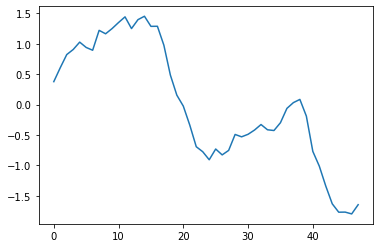

SAX string: ffggggghhhhhhhhhhgfedcbbbbbbcccccccddeedbbaaaaaa
Starting melody playback:
Finished!


In [24]:
print("Graph of data post-PAA:")
plt.plot(hr2_paa_1_25); plt.show()
print("SAX string:", hr2_sax_short)

# Calls the melody function on the new string
print("Starting melody playback:")
# # Commented out for not interrupting the demo
# melody(hr2_sax_short)
print("Finished!")

## Comparing different patients

The [PhysioNet contest](https://physionet.org/content/challenge-2009/1.0.0/) from which these data are taken (the "training" dataset) involved, as the title would suggest, "Predicting Acute Hypotensive Episodes." As such, the training data includes patients with and without periods of acute hypotension, as well as those who experienced hypotension before or after the data were collected. There are a wide variety of data. Hopefully we can see -- <em> and hear</em> -- as much.

### Function to do everything in one step

Below I will define a function for running the whole procedure (read in data --> znorm --> PAA --> SAX) on any given data file, and then another which adds the melody. (It's useful to be able to call your sound up on cue.)

In [25]:
# Take one of the data files and return the sax string
# - data_file: path to the .dat file from MIMIC II
# - black_box: FALSE if you want graphs and feedback displayed;
#              TRUE if, well, you don't.
def saxify(data_file, black_box):
    # Read in the data file.
    data = pd.read_csv(data_file, header = None)
    
    # Convert to a normal array of floats.
    hr_raw = data[0]
    
    # Graph the raw data (if desired)
    if not black_box:
        print("Raw data:")
        plt.plot(hr_raw)
        plt.show()       
    
    # Normalize
    hr_norm = znorm(hr_raw)
    
    # Apply PAA
    paa_size = len(hr_norm) // 80 # int(len(hr_norm) / paa_modifier)
    if not black_box: print("PAA size =", paa_size)
    hr_paa = paa(hr_norm, paa_size)
    # ... and graph if desired
    if not black_box:
        print("Smoothed data after PAA:"); plt.plot(hr_paa); plt.show()
    
    # Create SAX string
    hr_sax = ts_to_string(hr_paa, cuts_for_asize(8))
    # ... and display if desired
    if not black_box:
        print("SAX string:", hr_sax)
    
    # Returns the SAX string
    return hr_sax

# Just a function that calls saxify() and melody() in sequence.
def sonify(data_file, black_box):
    melody(saxify(data_file, black_box), black_box)

### Applying function to other datasets

In [26]:
# # Commented out for not interrupting the demo
# sonify("newImprovedData/HR_a40834_1.dat", black_box = False)

## Demo for presentation

Here I call saxify() and melody() separately.

Raw data:


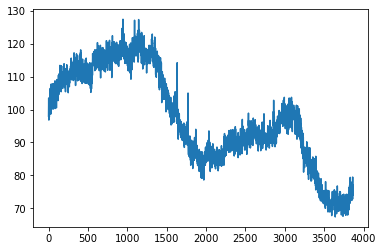

PAA size = 48
Smoothed data after PAA:


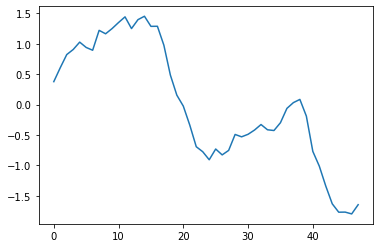

SAX string: ffggggghhhhhhhhhhgfedcbbbbbbcccccccddeedbbaaaaaa


In [27]:
sax_1 = saxify("newImprovedData/HR_a40006_1.dat", black_box = False)

In [28]:
melody(sax_1, black_box = False)

Starting playback...
ffggggghhhhhhhhhhgfedcbbbbbbcccccccddeedbbaaaaaa
Finished!


Raw data:


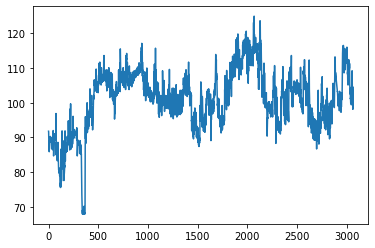

PAA size = 38
Smoothed data after PAA:


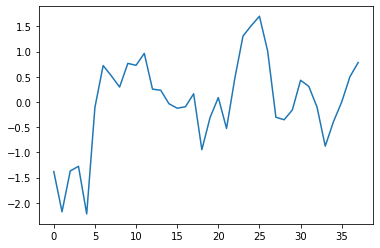

SAX string: aaaaadgfegggeedddebdecfhhhgdcdfedbcefg


In [29]:
sax_2 = saxify("newImprovedData/HR_a40834_1.dat", black_box = False)

In [30]:
melody(sax_2, black_box = False)

Starting playback...
aaaaadgfegggeedddebdecfhhhgdcdfedbcefg
Finished!
